In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
warnings.filterwarnings("ignore")
%matplotlib inline
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [121]:
data = pd.read_csv("C:/Users/DELL/Documents/project/income.csv")

In [122]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [123]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [125]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [126]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [127]:
data.columns = [cols.replace(' ', '') for cols in data.columns]

In [128]:
data = data.replace('?', np.nan)

In [129]:
def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values

In [130]:
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.000000
1,workclass,2498,0.056828
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,educational-num,0,0.000000
5,marital-status,0,0.000000
6,occupation,2506,0.057010
7,relationship,0,0.000000
8,race,0,0.000000
9,gender,0,0.000000


In [131]:
data.dropna(inplace=True,axis=0)

In [132]:
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.0
1,workclass,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,educational-num,0,0.0
5,marital-status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,gender,0,0.0


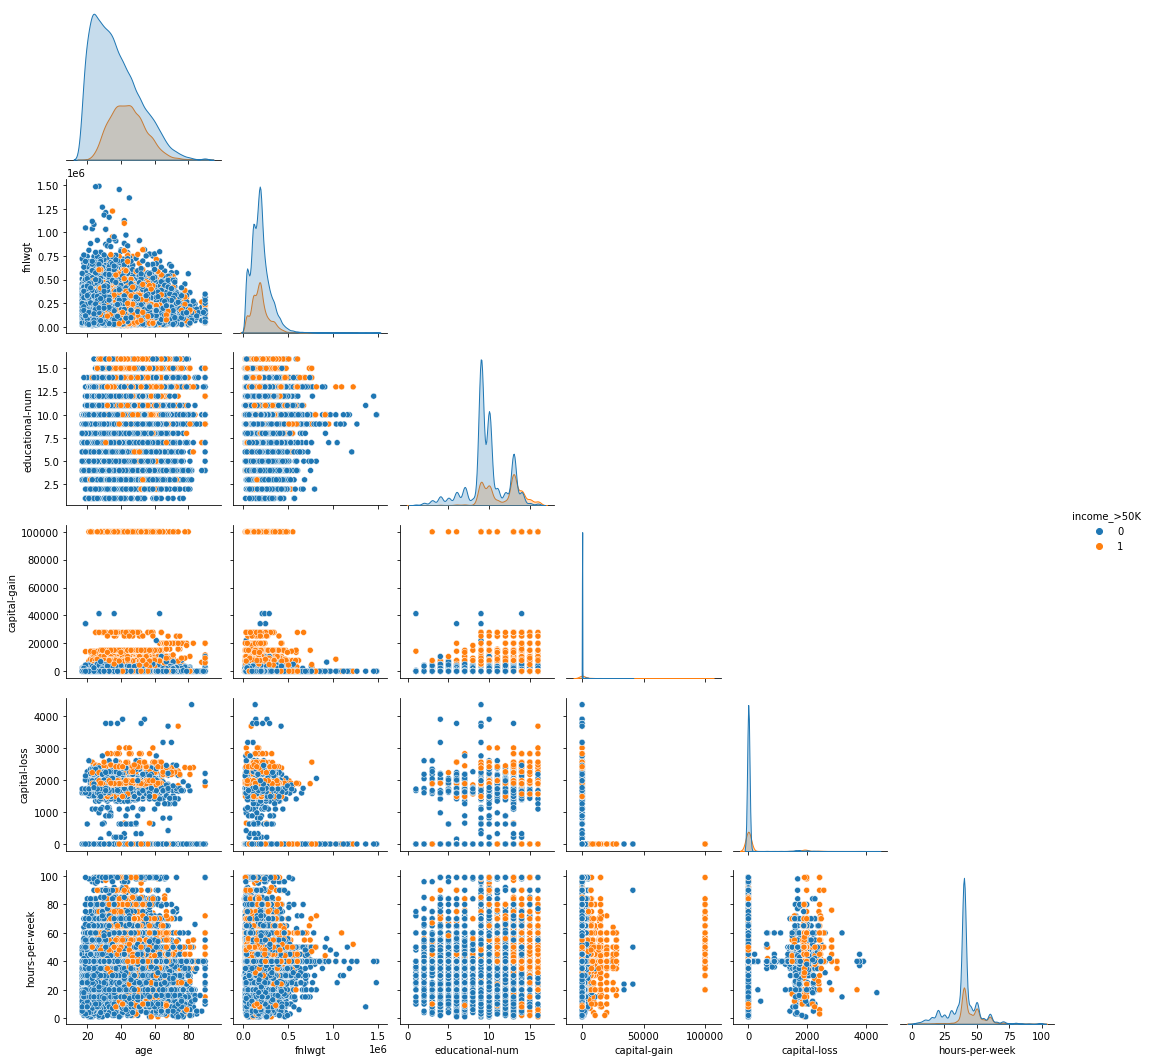

In [148]:
sns.pairplot(data,hue='income_>50K',corner=True)

<AxesSubplot:>

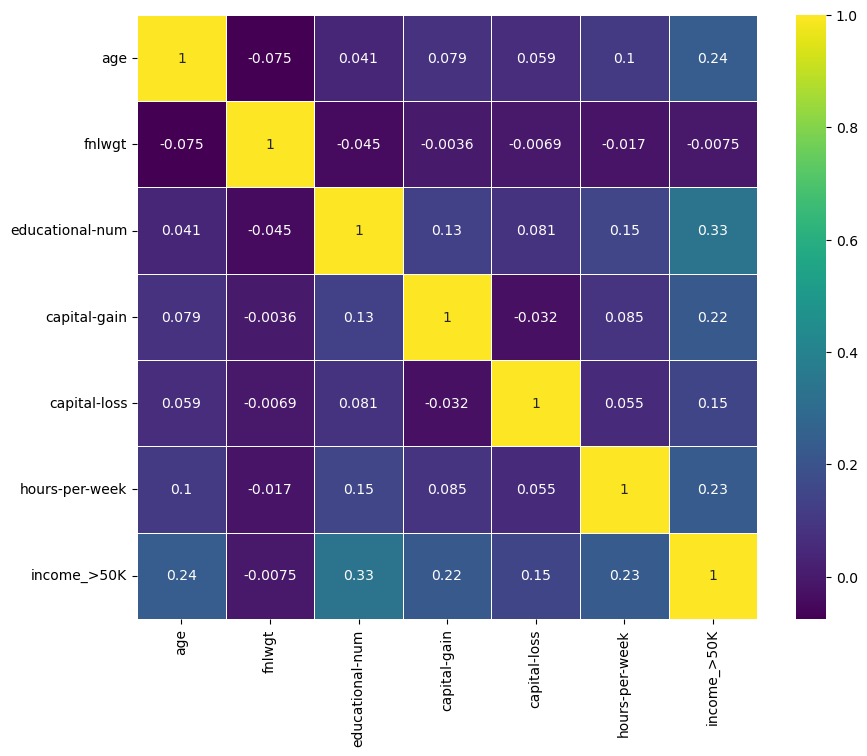

In [134]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(data.corr(),cmap="viridis",annot=True,linewidth=0.5)

<AxesSubplot:xlabel='income_>50K', ylabel='educational-num'>

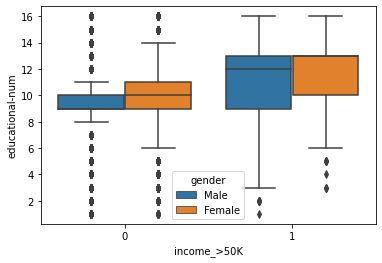

In [149]:
sns.boxplot(x='income_>50K',y='educational-num',data=data,hue="gender")

In [150]:
def hist(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

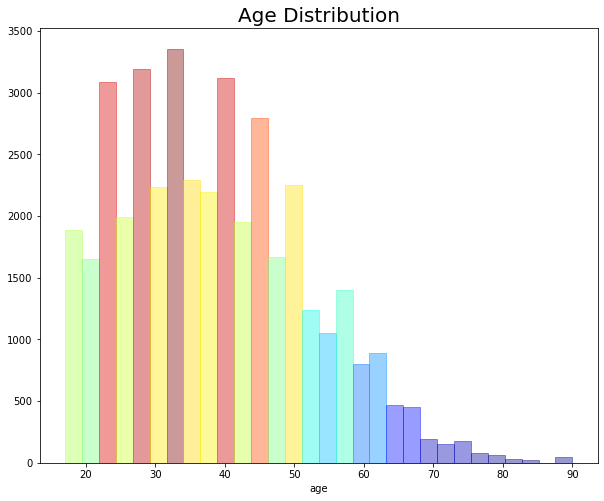

In [151]:
hist(data.age,"Age Distribution")

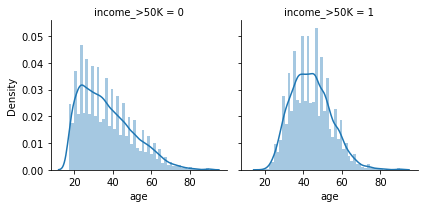

In [152]:
grid = sns.FacetGrid(data, col='income_>50K')
grid = grid.map(sns.distplot, "age")

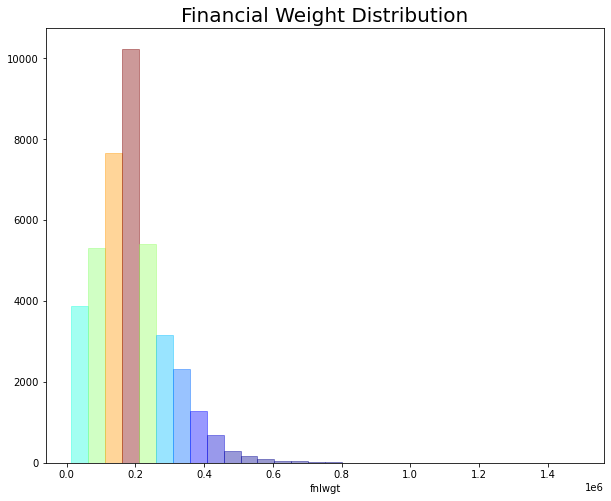

In [153]:
hist(data.fnlwgt,"Financial Weight Distribution")

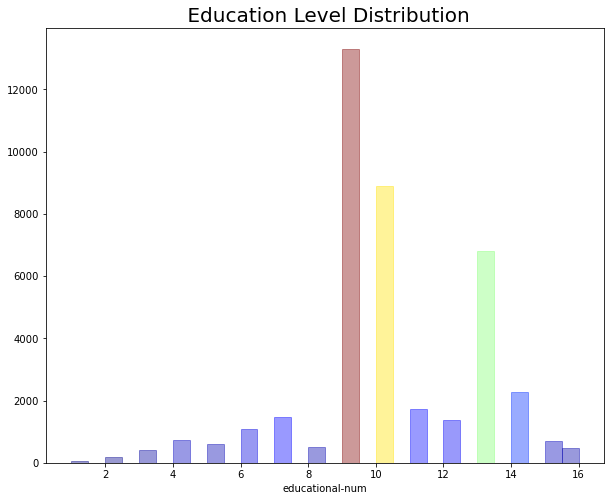

In [154]:
hist(data["educational-num"]," Education Level Distribution")

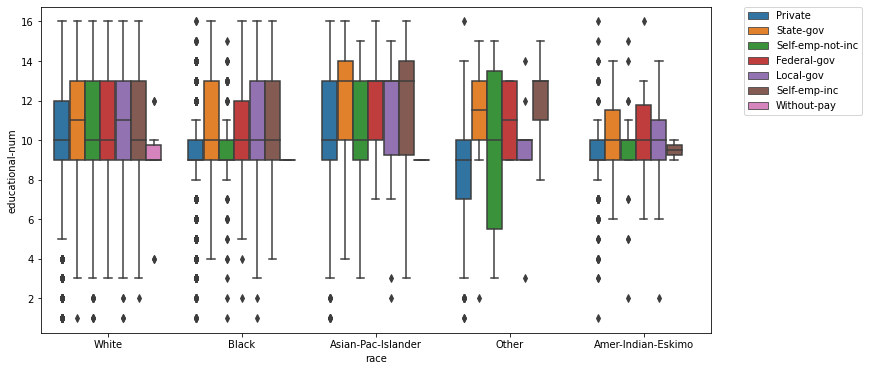

In [155]:
plt.figure(figsize=(12,6))
sns.boxplot(x='race',y='educational-num',data=data,hue='workclass')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'State-gov'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay')])

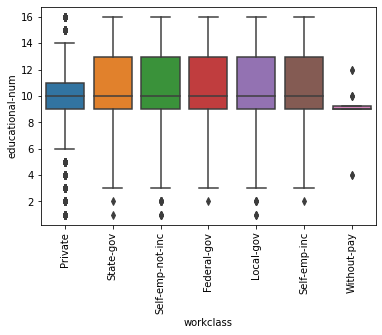

In [156]:
sns.boxplot(x='workclass',y='educational-num',data=data)
plt.xticks(rotation=90)

In [143]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [144]:
cat_columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']
df_dumy = pd.get_dummies(data, columns = cat_columns)
df_dumy

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,17,244602,8,0,0,15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,31,174201,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,58,110199,4,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,149248,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43953,19,116562,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43954,30,197947,10,0,0,58,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43955,46,97883,13,0,0,35,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [157]:
X = df_dumy.drop("income_>50K",axis=1)
y = df_dumy["income_>50K"]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=101)

In [159]:
scaler = StandardScaler()

In [160]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [161]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [162]:
tuned_model_rf = RandomForestClassifier(n_estimators=150,max_features=5)
tuned_model_rf.fit(scaled_X_train, y_train)
predictions = tuned_model_rf.predict(scaled_X_test)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'fnlwgt'),
  Text(2, 0, 'native-country_Haiti'),
  Text(3, 0, 'native-country_Guatemala'),
  Text(4, 0, 'native-country_Greece')])

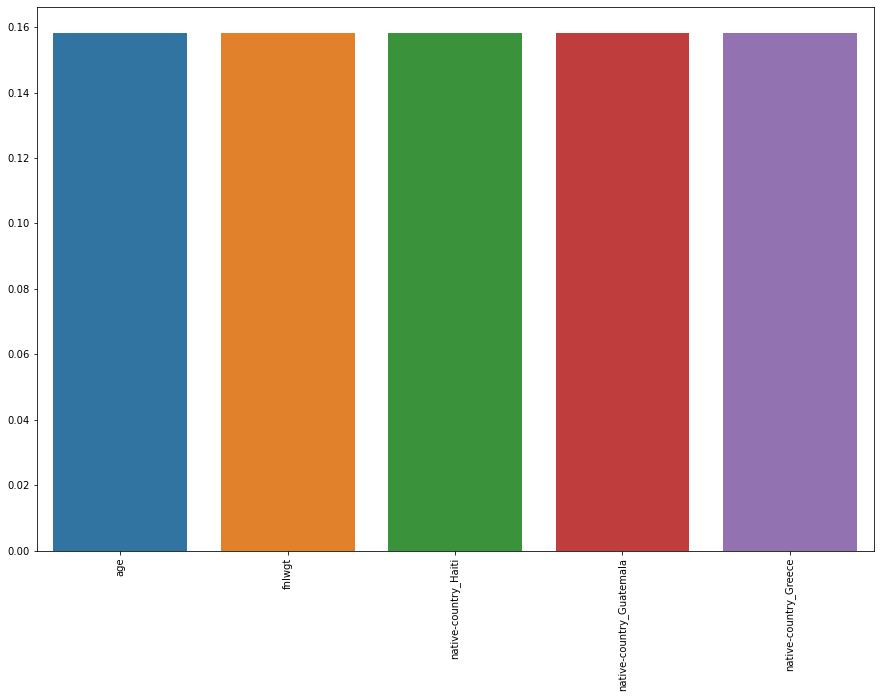

In [163]:
coefs = pd.Series(index=X.columns,data=tuned_model_rf.feature_importances_[0])
coefs = coefs.sort_values(ascending=False)[:5]

plt.figure(figsize=(15,10))
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90)

In [164]:
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [('LR', LogisticRegression()),
             ('KNN', KNeighborsClassifier()),
             ('DTC', DecisionTreeClassifier()),
             ('RFC', RandomForestClassifier(n_estimators=trees,max_features=3))]


for name, model in model_list:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)

LR: 0.8195238593199343 (0.006410311684477739)
KNN: 0.8247283318387449 (0.004367257918147866)
DTC: 0.9133345796457777 (0.0037535594855644784)
RFC: 0.9258656297610204 (0.0032177164323382765)
